Import section, all imports should go to the below cell

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib as mp
import gaia_tools as gt
import scipy
from scipy.ndimage import gaussian_filter
import astropy.units as u
from astropy.coordinates import SkyCoord

Reading in the data and variables

In [3]:
# reading in simulation data about the LMC cdm wake
stars = np.load('C:/Users/dnurm/Desktop/Uni_files/Thesis/.venv/Data/star_particles_pos_5e8.npy')
starsdf = pd.DataFrame(stars)
starsdf = starsdf.rename(columns={0:"x", 1:"y", 2:"z"})

# to remove outliers in the z axis with np.where, I first need to convert the column to a numeric type with pd.to_numeric.
# z axis is chosen specifically because, if the data is plotted in the x-z axis, the relevant data is clearly bound between -20 and 20 kpc.
# This 
starsdf["z"] = pd.to_numeric(starsdf["z"], errors="coerce")
starsdf['z'] = np.where((starsdf['z'] > 20) | (starsdf['z'] < -20), np.nan, starsdf['z'])
starsdf = starsdf.dropna(subset=["z"])

x_s = starsdf['x']
y_s = starsdf['y']
z_s = starsdf['z']

bins = (35, 35)

Visualization of the x and y plane to bring out the overdensity in the simulation. 

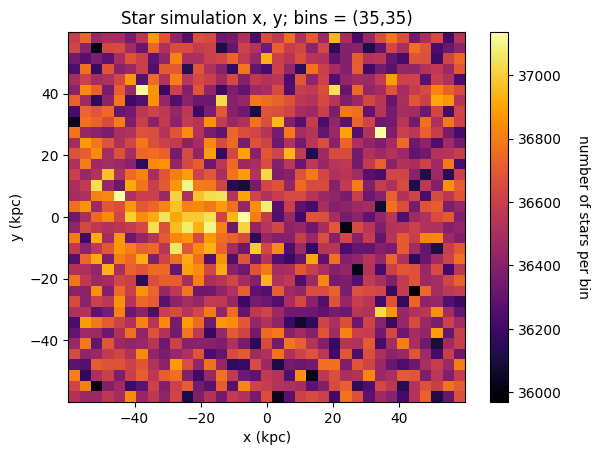

In [7]:
hist = plt.hist2d(x_s,y_s, bins=bins, cmap = "inferno")
plt.title("Star simulation x, y; bins = (35,35)")
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
cmap = plt.colorbar()
cmap.set_label('number of stars per bin', rotation=270, labelpad=20)

Smoothing of the above data

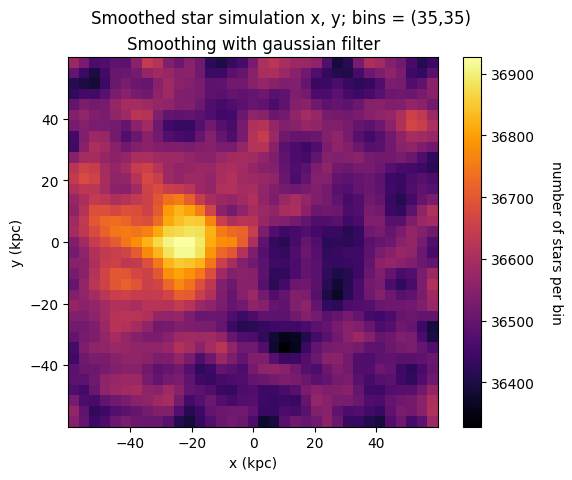

In [ ]:
##ceating np histogram
hist_s, xedges, yedges = np.histogram2d(x_s, y_s, bins=(35,35))
#hist_s, xedges, yedges = np.histogram2d(x_s, y_s, bins=(65,65))

##smoothing the histogram with gauss filter
hist_smoothed = gaussian_filter(hist_s, sigma=1)

##plotting the smoothed histogram
plt.imshow(hist_smoothed.T, origin='lower', cmap="inferno", extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.suptitle("Smoothed star simulation x, y; bins = (35,35)")
plt.title("Smoothing with gaussian filter")

#plt.title("Star simulation x, y; bins = (65,65)")
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
cmap = plt.colorbar()
cmap.set_label('number of stars per bin', rotation=270, labelpad=20)


Calculating and visualizing overdensity